In [1]:
pip install aquacrop

In [2]:
from pathlib import Path
print(Path("/content/weather_data/champion_climate.txt").is_file())

True


In [3]:
import importlib, environment
importlib.reload(environment)
from environment import Wheat

In [4]:
env = Wheat(climate_file="/content/weather_data/champion_climate.txt")
obs, info = env.reset()


In [5]:
import numpy as np
import pandas as pd

In [6]:
metrics = []
N_EPISODES = 100

for ep in range(N_EPISODES):
    obs, info = env.reset(seed=ep)
    done = False
    while not done:
        metrics.append(env.get_named_metrics())
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

df = pd.DataFrame(metrics)
print(df.head())


   age_days  canopy_cover  biomass  depletion_ratio   taw
0       0.0           0.0      0.0         0.000000  48.0
1       0.0           0.0      0.0         0.069354  48.0
2       0.0           0.0      0.0        -0.378208  48.0
3       0.0           0.0      0.0        -0.424333  48.0
4       0.0           0.0      0.0        -0.064146  48.0


In [7]:
corr = df.corr(method="pearson")
print(corr)

                 age_days  canopy_cover   biomass  depletion_ratio       taw
age_days         1.000000      0.359912  0.948904         0.198160  0.455667
canopy_cover     0.359912      1.000000  0.587796         0.278397  0.871620
biomass          0.948904      0.587796  1.000000         0.245774  0.604210
depletion_ratio  0.198160      0.278397  0.245774         1.000000  0.287910
taw              0.455667      0.871620  0.604210         0.287910  1.000000


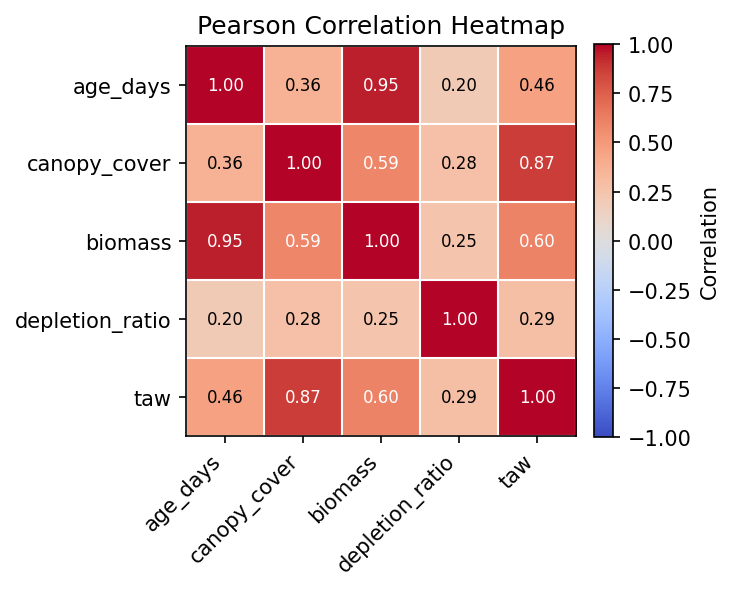

In [13]:
import matplotlib.pyplot as plt

labels = corr.columns.to_list()
M = corr.values
n = len(labels)

fig, ax = plt.subplots(figsize=(5, 7), dpi=150)

im = ax.imshow(M, vmin=-1, vmax=1, cmap="coolwarm")


ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_yticklabels(labels)


cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlation")


ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)


for i in range(n):
    for j in range(n):
        val = M[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        ax.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8, color=color)

ax.set_title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap_full.png", bbox_inches="tight")
plt.show()
